## Pentomino with Dancing Links Algorithm


To solve the pentomino problem with dancing links, again we must convert the values into binary.

We have two main constraint here:

1. Pentomino. For each pentomino, there is a constraint that it must be placed exactly one. Since we have 12 tiles, we can just have an array of size 12, give each tile an index position and mark the corresponding index.
2. Square, for each 60 squares (8x8 chessboard, minus 4 squares in the middle), there is a constraint that the tile can only be placed once. The simplest way is to name each tile based on the ij position, and mark them. So we have a total of 60 indices. See below.

The size of our constraint matrix is then `12 + 60 = 72`.


## Board with the index marked
```
11	12	13	14	15	16	17	18
21	22	23	24	25	26	27	28
31	32	33	34	35	36	37	38
41	42	43			46	47	48
51	52	53			56	57	58
61	62	63	64	65	66	67	68
71	72	73	74	75	76	77	78
81	82	83	84	85	86	87	88
```

## Note

In this solution, we did not deal with rotation - we assume each tile rotation is fixed. Of course, we can choose to randomize the rotation.

In [363]:
%matplotlib inline

import sys
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import numpy as np
# import colorsys
import seaborn as sns

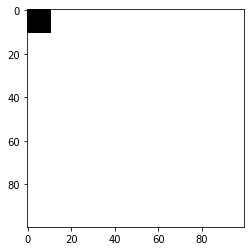

In [17]:
im = Image.new('RGBA', (100, 100), (255, 255, 255, 0))

draw = ImageDraw.Draw(im)
draw.rectangle([0, 0, 10, 10], outline='black', fill='black')
del draw
plt.imshow(im)

In [35]:
# The naming can be found here: https://en.wikipedia.org/wiki/Pentomino
# Note, each point represent the (row, col) respectively.


In [346]:
# colors = []
# for c in range(N):
#     r, g, b = colorsys.hsv_to_rgb(c*1.0/N, 0.5, 0.5)
#     r, g, b = r * 255, g * 255, b * 255
#     colors.append((int(r), int(g), int(b)))
# colors
palette = sns.color_palette(None, 12)
colors = palette.as_hex()
colors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf',
 '#1f77b4',
 '#ff7f0e']

In [347]:
board = np.ones((8, 8))
board[3, 3] = 0
board[3, 4] = 0
board[4, 4] = 0
board[4, 3] = 0
board

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 0., 1., 1., 1.],
       [1., 1., 1., 0., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

In [394]:
labels = ['I', 'N', 'L', 'U', 'X', 'W', 'P', 'F', 'Z', 'T', 'V', 'Y']

# Pairs of rows and columns that are occupied by the pentomine.
pentomino = [[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)],
             [(0, 0), (1, 0), (1, 1), (2, 1), (3, 1)],
             [(0, 0), (0, 1), (1, 1), (2, 1), (3, 1)],
             [(0, 0), (0, 1), (1, 0), (2, 0), (2, 1)],
             [(0, 1), (1, 0), (1, 1), (1, 2), (2, 1)],
             [(0, 0), (0, 1), (1, 1), (1, 2), (2, 2)],
             [(0, 0), (0, 1), (0, 2), (1, 1), (1, 2)],
             [(0, 2), (1, 0), (1, 1), (1, 2), (2, 1)],
             [(0, 1), (0, 2), (1, 1), (2, 0), (2, 1)],
             [(0, 0), (1, 0), (1, 1), (1, 2), (2, 0)],
             [(0, 2), (1, 2), (2, 0), (2, 1), (2, 2)],
             [(0, 2), (1, 0), (1, 1), (1, 2), (1, 3)]]

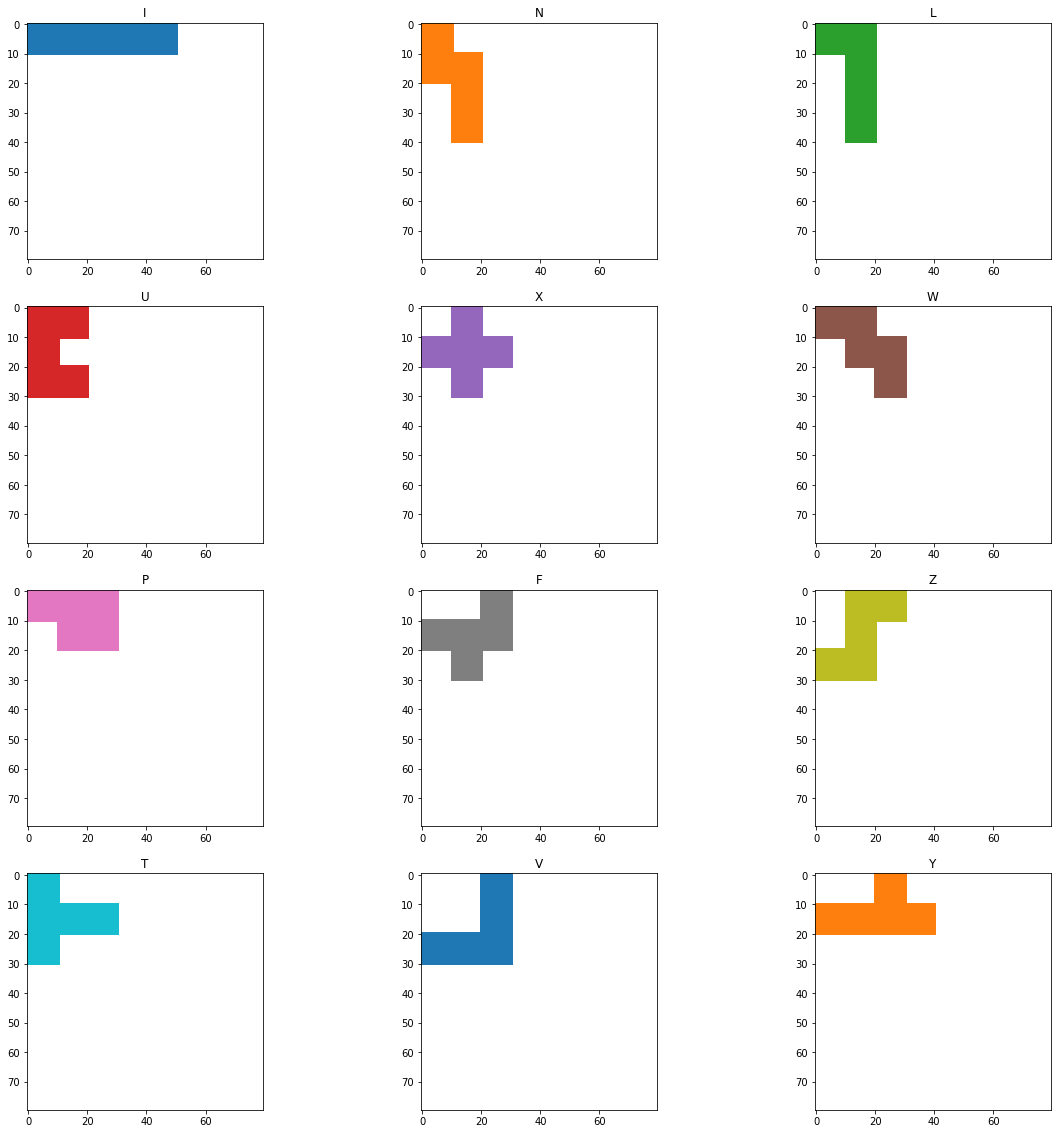

In [396]:
size = 10

# Total 12 tiles.
rows = 4
cols = 3

figure = plt.figure(figsize=(20, 20))

for i, points in enumerate(pentomino):
    im = Image.new('RGBA', (80, 80), (255, 255, 255, 0))
    draw = ImageDraw.Draw(im)
    label = labels[i]
    for (row, col) in points:
        lo = (col * size, row * size)
        hi = ((col+1) * size, (row+1) * size)
        color = colors[i]
        draw.rectangle((lo, hi), outline=None, fill=color)
    del draw
    
    figure.add_subplot(rows, cols, i+1)
    plt.title(label)
    plt.imshow(im)

In [393]:
# Convert each row, column into a matrix representative.
tiles = []
for i, points in enumerate(pentomino):
    max_row = max([row for row, col in points])
    max_col = max([col for row, col in points])
    tile = np.zeros((max_row+1, max_col+1))
    for row, col in points:
        tile[row, col] = 1
    tiles.append((labels[i], tile))

In [398]:
for label, tile in tiles:
    print(label)
    print(tile)
    print()

I
[[1. 1. 1. 1. 1.]]

N
[[1. 0.]
 [1. 1.]
 [0. 1.]
 [0. 1.]]

L
[[1. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]

U
[[1. 1.]
 [1. 0.]
 [1. 1.]]

X
[[0. 1. 0.]
 [1. 1. 1.]
 [0. 1. 0.]]

W
[[1. 1. 0.]
 [0. 1. 1.]
 [0. 0. 1.]]

P
[[1. 1. 1.]
 [0. 1. 1.]]

F
[[0. 0. 1.]
 [1. 1. 1.]
 [0. 1. 0.]]

Z
[[0. 1. 1.]
 [0. 1. 0.]
 [1. 1. 0.]]

T
[[1. 0. 0.]
 [1. 1. 1.]
 [1. 0. 0.]]

V
[[0. 0. 1.]
 [0. 0. 1.]
 [1. 1. 1.]]

Y
[[0. 0. 1. 0.]
 [1. 1. 1. 1.]]



In [386]:
size = 8

candidates = []

# The 4 empty space in the 8x8 board.
empty_zone = [(3, 3), (3, 4), (4, 4), (4, 3)]

# For each tile, generate the candidates - the positions that each tile can
# be placed on the board.
for label, tile in tiles:
    h, w = tile.shape
    
    for row in range(size):
        for col in range(size):
            if h+row <= size and w+col <= size:
                candidate = pentomino[labels.index(label)]
                candidate = [(row_c+row, col_c+col) 
                             for (row_c, col_c) in candidate]
                if any(zone in candidate for zone in empty_zone):
                    continue
                candidates.append((label, candidate))
candidates[:3], len(candidates)

([('I', [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)]),
  ('I', [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]),
  ('I', [(0, 2), (0, 3), (0, 4), (0, 5), (0, 6)])],
 298)

In [354]:
# Convert each candidate into it's respective constraint index.
# We have 60 board cells (8x8 - 4 center cells), and 12 different tiles, 
# which amount to 72 different constraints.

# Prepare reverse index for tile position.
tile_index = {}
corr = 0
for i in range(0, 8):
    for j in range(0, 8):
        if (i == 3 or i == 4) and (j == 3 or j == 4):
            # When we skip the 4 middle tiles,
            # we need to correct the index from 0 - 64 to 0 - 60.
            corr += 1
            continue
        tile_index[(i, j)] = i * 8 + j - corr

In [387]:
A = np.zeros((len(candidates), 72))
metadata = []
for i, (label, candidate) in enumerate(candidates):
    A[i][60 + labels.index(label)] = 1
    for c in candidate:
        A[i][tile_index[c]] = 1

In [388]:
%run dlx.py

<Figure size 432x288 with 0 Axes>

In [357]:
result = DLX.solve(A)
result

[245, 294, 0, 145, 45, 69, 77, 165, 107, 182, 208, 258]

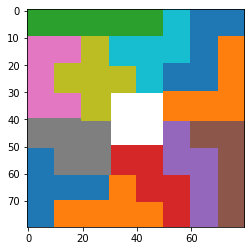

In [390]:
solution = [candidates[res] for res in result]
im = Image.new('RGBA', (80, 80), (255, 255, 255, 0))
size = 10
draw = ImageDraw.Draw(im)

# fnt = ImageFont.truetype('Arial', 8)

for i, (label, points) in enumerate(solution):
    for (row, col) in points:
        lo = (col * size, row * size)
        hi = ((col+1) * size, (row+1) * size)
        color = colors[i]
        draw.rectangle((lo, hi), outline=None, fill=color)
#         draw.text((col*size, row*size), label)
del draw
plt.imshow(im)